# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>


# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call

# commented out the below because we are only going to be using the get function from requests
# import requests
# if did this way, you would not do .get() it would be requests.get()

from requests import get


response = get('https://pokeapi.co/api/v2/pokemon/psyduck/')

# code below gives status code. code 200 is good, 404 is bad
# print(response.status_code)

print(response.headers['Content-Type'])

# setting a condition before json runs prevents bad runs (accounts for typos)
# if response.status_code == 200:
if response.ok:
# global json method = .json()
    current_poke_data = response.json()
else:
    print(f'Bad request {response.status_code}, please choose valid Pokemon')



# json() makes a dict
# print(type(response.json()))

application/json; charset=utf-8


In [ ]:
# Status Codes :

# 200 OK: Request was successful; data returned.
# 201 Created: New resource successfully created.
# 204 No Content: Request successful; no data to return.
# 400 Bad Request: Malformed request or validation error.
# 401 Unauthorized: Authentication credentials missing or invalid.
# 403 Forbidden: Authenticated but lack permission.
# 404 Not Found: Requested resource doesn't exist.
# 429 Too Many Requests: Exceeded rate limit; wait before retrying.
# 500 Internal Server Error: Server-side error; not your fault.

### Display a Pokemon's name, weight, abilities, and types

In [19]:
# get the name
# working with a dictionary. name is a key value so we are keying in
current_poke_data['name']

'psyduck'

In [22]:
# get types
current_poke_data['types']

[{'slot': 1,
  'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]

In [23]:
# get weight
current_poke_data['weight']

196

In [24]:
# get abilities
current_poke_data['abilities']

[{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'},
  'is_hidden': False,
  'slot': 1},
 {'ability': {'name': 'cloud-nine',
   'url': 'https://pokeapi.co/api/v2/ability/13/'},
  'is_hidden': False,
  'slot': 2},
 {'ability': {'name': 'swift-swim',
   'url': 'https://pokeapi.co/api/v2/ability/33/'},
  'is_hidden': True,
  'slot': 3}]

In [ ]:
# Create a structure for a single pokemon

# to make the structure, you can set a key value and then use the "get" value as the key value.

In [25]:
psyduck = {
    'name': current_poke_data['name'],
    'types': current_poke_data['types'],
    'weight': current_poke_data['weight'],
    'abilities': current_poke_data['abilities']
}

print(psyduck)

{'name': 'psyduck', 'types': [{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}], 'weight': 196, 'abilities': [{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'cloud-nine', 'url': 'https://pokeapi.co/api/v2/ability/13/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'swift-swim', 'url': 'https://pokeapi.co/api/v2/ability/33/'}, 'is_hidden': True, 'slot': 3}]}


#### Create a function to Pull in your own Pokemon's data

In [3]:
def poke_api_call(pokemon):
    res = get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    if res.ok:
        data = res.json()
        pokemon_dict = {
            'name': data['name'],
            'types': data['types'],
            'weight': data['weight'],
            'abilities': data['abilities']
        }
    else:
        print(f"Invalid request. Status code: {response.status_code}. Please enter valid Pokemon")
        return {'message' :f"Invalid request. Status code: {response.status_code}. Please enter valid Pokemon"}
    
    return pokemon_dict

poke_api_call('pikachu')

{'name': 'pikachu',
 'types': [{'slot': 1,
   'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}],
 'weight': 60,
 'abilities': [{'ability': {'name': 'static',
    'url': 'https://pokeapi.co/api/v2/ability/9/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'lightning-rod',
    'url': 'https://pokeapi.co/api/v2/ability/31/'},
   'is_hidden': True,
   'slot': 3}]}

Choose your pokemon

In [9]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']

# dictionary via a generator so we need {} because it's dictionary
random_six_pokemon = {i: poke_api_call(i) for i in random_team}

print(random_six_pokemon)

{544: {'name': 'whirlipede', 'types': [{'slot': 1, 'type': {'name': 'bug', 'url': 'https://pokeapi.co/api/v2/type/7/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'weight': 585, 'abilities': [{'ability': {'name': 'poison-point', 'url': 'https://pokeapi.co/api/v2/ability/38/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'swarm', 'url': 'https://pokeapi.co/api/v2/ability/68/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'speed-boost', 'url': 'https://pokeapi.co/api/v2/ability/3/'}, 'is_hidden': True, 'slot': 3}]}, 15: {'name': 'beedrill', 'types': [{'slot': 1, 'type': {'name': 'bug', 'url': 'https://pokeapi.co/api/v2/type/7/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'weight': 295, 'abilities': [{'ability': {'name': 'swarm', 'url': 'https://pokeapi.co/api/v2/ability/68/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'sniper', 'url': 'https://pokeapi.co/api/v2/ability/97

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [12]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
print(random_team)

my_six_pokemon = {}

# most common way
for pokemon in your_team:
    my_six_pokemon[pokemon] = poke_api_call(pokemon)


for k,v in my_six_pokemon.items():
    print(f'{k}: {v}')
# dictionary generator

print('       ')

for k,v in random_six_pokemon.items():
    print(f'{k}: {v}')

[544, 15, 190, 99, 859, 575]
electabuzz: {'name': 'electabuzz', 'types': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'weight': 300, 'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'vital-spirit', 'url': 'https://pokeapi.co/api/v2/ability/72/'}, 'is_hidden': True, 'slot': 3}]}
haunter: {'name': 'haunter', 'types': [{'slot': 1, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'weight': 1, 'abilities': [{'ability': {'name': 'levitate', 'url': 'https://pokeapi.co/api/v2/ability/26/'}, 'is_hidden': False, 'slot': 1}]}
tyranitar: {'name': 'tyranitar', 'types': [{'slot': 1, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}, {'slot': 2, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}], 'weight': 2020, '

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [113]:
# # ---------------EXAMPLE RUNNING WITH METHODS FOR CLEAN UP ON TYPES AND ABILITIES-----------------------
      
            
# # --------INLINE VERSION TO CLEAN UP TYPES AND ABILITIES---------------------------    
# # --------SUBSTITUTE THIS IN THE SELF. SECTIONS---------------------------  
# #         self.abilities = [ability['ability']['name'] for ability in data['abilities']]
# #         self.types = [poke_type['type']['name'] for poke_type in data['types']]
        
# --------METHODS TO CLEAN UP TYPES AND ABILITIES---------------------------

#                self.abilities = data['abilities']
#                 self.types = data['types']
# data['abilities']
# > [{ability1}, {ability2}]
# data['abilities']['ability']
# {
#     ability:{
#            name: blaze
#     }
#     is hideen
#     slot
# }



#     def extract_abilities(self):
#         abilities = []
#         for ability in self.abilities:
#                 abilities.append(ability['ability']['name'])
#         print(abilities)
#         self.abilities = abilities
    
#     def extract_types(self):
#         types = []
#         for type in self.types:
#             types.append(type['type']['name'])
#         print(types)
#         self.types = types
            


['damp', 'cloud-nine', 'swift-swim']
['water']
['damp', 'water-absorb', 'unaware']
['water', 'ground']


<Pokemon: psyduck>
['damp', 'cloud-nine', 'swift-swim']
['water']


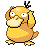

In [193]:
# ---------------EXAMPLE RUNNING WITH INLINE FOR CLEAN UP ON TYPES AND ABILITIES-----------------------
class Pokemon():
    
    def __init__(self, pokemon):
        self.name = pokemon
        self.weight = None
        self.abilities = []
        self.types = []
        self.sprite = None
        self.poke_api_call()
        
    def __repr__(self):
        return f'<Pokemon: {self.name}>'
    
    def poke_api_call(self):
        while True:
            res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
            if res.ok:
                data = res.json()
                self.name = data['name']
                self.weight = data['weight']
                self.abilities = [ability['ability']['name'] for ability in data['abilities']]
                self.types = [poke_type['type']['name'] for poke_type in data['types']]
                self.sprite = self.get_sprite(data)
                break
            else:
                print(f'Invalid Request, status code {res.status_code}, Please enter valid pokemon')
                self.update_pokemon()
            
    def update_pokemon(self):
        self.name = input('Pokemon name: ')
        
    def get_sprite(self, data):
        animated = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
        return animated if animated else data['sprites']['front_default']
    
    def display_img(self):
        display(Image(self.sprite, width = 75))
        
    def display_info(self):
        print(f'{self.name} Weight: {self.weight}')
        print('Types: ')
        for poke_type in self.types:
            print(poke_type)
        print('Abilities: ')
        for ability in self.abilities:
            print(ability)
        self.display_img()
        
psyduck = Pokemon('psyduck')

# psyduck.poke_api_call()
print(psyduck)
print(psyduck.abilities)
print(psyduck.types)
psyduck.display_img()

In [187]:
from IPython.display import Image
# this MUST be run and allows you to start pulling images

### Let's Catch some Pokemon

What Pokemon are you catching?: aggron
What Pokemon are you catching?: lapras
What Pokemon are you catching?: caterpie
What Pokemon are you catching?: sandshrew
What Pokemon are you catching?: machop
What Pokemon are you catching?: machoke
Joshua's Team
aggron: <Pokemon: aggron>
aggron Weight: 3600
Types: 
steel
rock
Abilities: 
sturdy
rock-head
heavy-metal


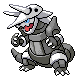

lapras: <Pokemon: lapras>
lapras Weight: 2200
Types: 
water
ice
Abilities: 
water-absorb
shell-armor
hydration


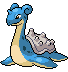

caterpie: <Pokemon: caterpie>
caterpie Weight: 29
Types: 
bug
Abilities: 
shield-dust
run-away


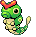

sandshrew: <Pokemon: sandshrew>
sandshrew Weight: 120
Types: 
ground
Abilities: 
sand-veil
sand-rush


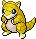

machop: <Pokemon: machop>
machop Weight: 195
Types: 
fighting
Abilities: 
guts
no-guard
steadfast


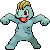

machoke: <Pokemon: machoke>
machoke Weight: 705
Types: 
fighting
Abilities: 
guts
no-guard
steadfast


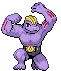

In [299]:
pokedex = {}

class Pokedex:
    
    def __init__(self, username):
        self.username = username
        self.collection = {}
        
    def __repr__(self):
        return f'<Pokedex: {self.username}>'
        
    def add_pokemon(self):
        pokemon_name = input("What Pokemon are you catching?: ")
        pokemon = Pokemon(pokemon_name)
        self.collection[pokemon.name] = pokemon
        
    def build_team(self):
        while len(self.collection) < 6:
            self.add_pokemon()
            
    def remove_pokemon(self):
        pokemon_to_remove = input('What Pokemon are you releasing?: ')
        if pokemon_to_remove in self.collection:
            self.collection.pop(pokemon_to_remove)
        else:
            print('Pokemon not in collection')
            
    def display_team(self):
        print(f'{self.username}\'s Team')
        for pokemon, instance in self.collection.items():
            print(f'{pokemon}: {instance}')
            instance.display_info()
            
pokedex = Pokedex('Joshua')

# pokedex.add_pokemon()
# print(pokedex.collection, 'before remove')
# pokedex.remove_pokemon()
# pokedex.collection

pokedex.build_team()
pokedex.display_team()

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [195]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [ ]:
'''



'''

In [207]:
# recreate your pokemon class here
class Pokemon():
    
    def __init__(self, pokemon):
        self.name = pokemon
        self.weight = None
        self.abilities = []
        self.types = []
        self.sprite = None
        self.poke_api_call()
        
    def __repr__(self):
        return f'<Pokemon: {self.name}>'
    
    def poke_api_call(self):
        while True:
            res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
            if res.ok:
                data = res.json()
                self.name = data['name']
                self.weight = data['weight']
                self.abilities = [ability['ability']['name'] for ability in data['abilities']]
                self.types = [poke_type['type']['name'] for poke_type in data['types']]
                self.sprite = self.get_sprite(data)
                break
            else:
                print(f'Invalid Request, status code {res.status_code}, Please enter valid pokemon')
                self.update_pokemon()
            
    def update_pokemon(self):
        self.name = input('Pokemon name: ')
        
    def get_sprite(self, data):
        animated = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
        return animated if animated else data['sprites']['front_default']
    
    def display_img(self):
        display(Image(self.sprite, width = 75))
        
    def display_info(self):
        print(f'{self.name} Weight: {self.weight}')
        print('Types: ')
        for poke_type in self.types:
            print(poke_type)
        print('Abilities: ')
        for ability in self.abilities:
            print(ability)
        self.display_img()

What Pokemon are you catching?: aggron
Joshua's Team
aggron: <Pokemon: aggron>
aggron Weight: 3600
Types: 
steel
rock
Abilities: 
sturdy
rock-head
heavy-metal


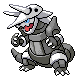

In [216]:
pokedex = {}

class Pokedex:
    
    def __init__(self, username):
        self.username = username
        self.collection = {}
        
    def __repr__(self):
        return f'<Pokedex: {self.username}>'
        
    def add_pokemon(self):
        pokemon = input("What Pokemon are you catching?: ")
        pokemon = Pokemon(pokemon)
        self.collection[pokemon.name] = pokemon
        
    def build_team(self):
        while len(self.collection) < 6:
            self.add_pokemon()
            
    def remove_pokemon(self):
        pokemon_to_remove = input('What Pokemon are you releasing?: ')
        if pokemon_to_remove in self.collection:
            self.collection.pop(pokemon_to_remove)
        else:
            print('Pokemon not in collection')
            
    def display_team(self):
        print(f'{self.username}\'s Team')
        for pokemon, instance in self.collection.items():
            print(f'{pokemon}: {instance}')
            instance.display_info()
            
pokedex = Pokedex('Joshua')

# pokedex.add_pokemon()
# print(pokedex.collection, 'before remove')
# pokedex.remove_pokemon()
# pokedex.collection

pokedex.add_pokemon()
pokedex.display_team()

# Calling our new method


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [ ]:
'''
evolve:

enter pokemon name
got to that pokemon page

through data > ['species']['url'] = species data

through species data > ['evolution_chain']['url'] - I looked at ditto and it still had this so every pokemon has it
                                                  = evolution chain data
through evolution chain data > ['chain']['evolves_to']['species']['url']
in ditto evolution chain data, evolves to is a blank list []. if that is the case, it should return that the pokemon can't
evolve

NOTE - if it has 3 total forms like charmander, there will be an ['evolves to'] 

'''

charmander Weight: 85
Types: 
fire
Abilities: 
blaze
solar-power


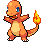

What would you like to evolve to?: aggron
aggron Weight: 3600
Types: 
steel
rock
Abilities: 
sturdy
rock-head
heavy-metal


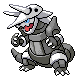

In [309]:
# POKEMON CLASS FOR EASIER ACCESS

class Pokemon():
    
    def __init__(self, pokemon):
        self.name = pokemon
        self.weight = None
        self.abilities = []
        self.types = []
        self.sprite = None
        self.poke_api_call()
    
#     overrides the default which is <__main__.Pokemon object at 0x000001BC4AD2F850> if you print the instance
    def __repr__(self):
        return f'<Pokemon: {self.name}>'
    
    def poke_api_call(self):
        while True:
            res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
            if res.ok:
                data = res.json()
                self.name = data['name']
                self.weight = data['weight']
                self.abilities = [ability['ability']['name'] for ability in data['abilities']]
                self.types = [poke_type['type']['name'] for poke_type in data['types']]
                self.sprite = self.get_sprite(data)
                break
            else:
                print(f'Invalid Request, status code {res.status_code}, Please enter valid pokemon')
                self.update_pokemon()
            
    def update_pokemon(self):
        self.name = input('Pokemon name: ')
        
    def get_sprite(self, data):
        animated = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
        return animated if animated else data['sprites']['front_default']
    
    def display_img(self):
        display(Image(self.sprite, width = 75))
        
    def display_info(self):
        print(f'{self.name} Weight: {self.weight}')
        print('Types: ')
        for poke_type in self.types:
            print(poke_type)
        print('Abilities: ')
        for ability in self.abilities:
            print(ability)
        self.display_img()
        
        
#------------Evolution Attempt---------------------------------------------------
        
    def evolve_pokemon(self):
        pokemon_res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if pokemon_res.ok:
            pokemon_data = pokemon_res.json()
            species_url = pokemon_data['species']['url']
            species_res = get(species_url)
            if species_res.ok:
                species_data = species_res.json()
                evolution_chain_url = species_data['evolution_chain']['url']
                evolution_chain_res = get(evolution_chain_url)
                if evolution_chain_res.ok:
                    evolution_chain_data = evolution_chain_res.json()
                    if  evolution_chain_data['chain']['evolves_to'] != []:
                        self.name = evolution_chain_data['chain']['evolves_to'][0]['species']['name']
                        self.poke_api_call()
                    else:
                        print(f"{self.name} cannot evolve")
                        
 #------BRUTE FORCE EVOLVE METHOD--------------------------------------------------------------
        
    def brute_evolve(self):
            pokemon_evolve = input("What would you like to evolve to?: ")
            self.name = pokemon_evolve
            self.poke_api_call()        
            

    
generic_pokemon = Pokemon('charmander')
print(generic_pokemon)

generic_pokemon.evolve_pokemon()
generic_pokemon.display_info()
# generic_pokemon.brute_evolve()
# generic_pokemon.display_info()

What Pokemon are you catching?: aron
aron: <Pokemon: aron>
aron Weight: 600
Types: 
steel
rock
Abilities: 
sturdy
rock-head
heavy-metal


What Pokemon do you want to evolve?: aron
What would you like to evolve to?: lairon
lairon: <Pokemon: lairon>
lairon Weight: 1200
Types: 
steel
rock
Abilities: 
sturdy
rock-head
heavy-metal


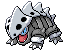

In [248]:
# POKEDEX CLASS FOR EASIER ACCESS

pokedex = {}

class Pokedex:
    
    def __init__(self, username):
        self.username = username
        self.collection = {}
        
    def __repr__(self):
        return f'<Pokedex: {self.username}>'
        
    def add_pokemon(self):
        pokemon = input("What Pokemon are you catching?: ")
        pokemon = Pokemon(pokemon)
        self.collection[pokemon.name] = pokemon
        
    def build_team(self):
        while len(self.collection) < 6:
            self.add_pokemon()
            
    def remove_pokemon(self):
        pokemon_to_remove = input('What Pokemon are you releasing?: ')
        if pokemon_to_remove in self.collection:
            self.collection.pop(pokemon_to_remove)
        else:
            print('Pokemon not in collection')
            
    def display_team(self):
        print(f'{self.username}\'s Team')
        for pokemon, instance in self.collection.items():
            print(f'{pokemon}: {instance}')
            instance.display_info()
            

        
            
pokedex = Pokedex('Joshua')

# pokedex.add_pokemon()
# print(pokedex.collection, 'before remove')
# pokedex.remove_pokemon()
# pokedex.collection

pokedex.add_pokemon()



Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [296]:
class Move_Tutor:
    
    def __init__(self, name):
        self.name = name
        self.move_list = []
        
    def driver(self):
        while True:
            teach_move_status = input(f'{self.name} looks like they want to learn a move! Would you like {self.name} to learn a move? [y]/[n]: ').lower()
            if teach_move_status in 'y':
                self.teach_move()
            elif teach_move_status in 'n':
                self.show_moves()
                print(f'{self.name} did not learn a new move')
                break
            else:
                print('Please enter a valid response')

                    
        
        
    def teach_move(self):
        if len(self.move_list) < 4:
            move_learned = input(f"What move would you like to teach {self.name}? ").lower()
            self.move_list.append(move_learned)
            print(f'{self.name} learned {move_learned}!')
        else:
            move_learned = input(f"What move would you like to teach {self.name}? ").lower()
            self.show_moves()
            replace_move = input(f'Your {self.name} already knows four moves. Please select one to replace: ').lower()
            while True:
                if replace_move in self.move_list:
                    self.move_list.remove(replace_move)
                    self.move_list.append(move_learned)
                    print(f'Your {self.name} forgot {replace_move} and learned {move_learned}!')
                    break
                else:
                    print('Please enter a valid move')


    
    def show_moves(self):
        print(f'{self.name}\'s moves')
        for moves in self.move_list:
            print(moves)

### .driver()

My thought is to set up a driver method that can execute the other methods. I can have this keep running until the person decides to opt out.

In [298]:
aggron = Move_Tutor('aggron')

aggron.driver()

aggron looks like they want to learn a move! Would you like aggron to learn a move? [y]/[n]: y
What move would you like to teach aggron? rock throw
aggron learned rock throw!
aggron looks like they want to learn a move! Would you like aggron to learn a move? [y]/[n]: y
What move would you like to teach aggron? rock tomb
aggron learned rock tomb!
aggron looks like they want to learn a move! Would you like aggron to learn a move? [y]/[n]: y
What move would you like to teach aggron? rock smash
aggron learned rock smash!
aggron looks like they want to learn a move! Would you like aggron to learn a move? [y]/[n]: y
What move would you like to teach aggron? iron tail
aggron learned iron tail!
aggron looks like they want to learn a move! Would you like aggron to learn a move? [y]/[n]: y
What move would you like to teach aggron? crunch
aggron's moves
rock throw
rock tomb
rock smash
iron tail
Your aggron already knows four moves. Please select one to replace: iron tail
Your aggron forgot iron t

### .teach_move()

In [ ]:
aggron = Move_Tutor('aggron')

aggron.teach_move()

### .show_moves()

In [284]:
aggron.show_moves()

aggron's moves
stone edge


In [ ]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [ ]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
